In [6]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('5000px', '5000px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('nx.html')

In [7]:
from pyvis.network import Network
import networkx as nx
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

In [8]:
G = nx.Graph()
G.add_edge(1, 2) # default edge data=1
G.add_edge(2, 3, weight=0.9)
nt = Network('900px', '1900px')
nt.from_nx(G)
nt.show('nx.html')

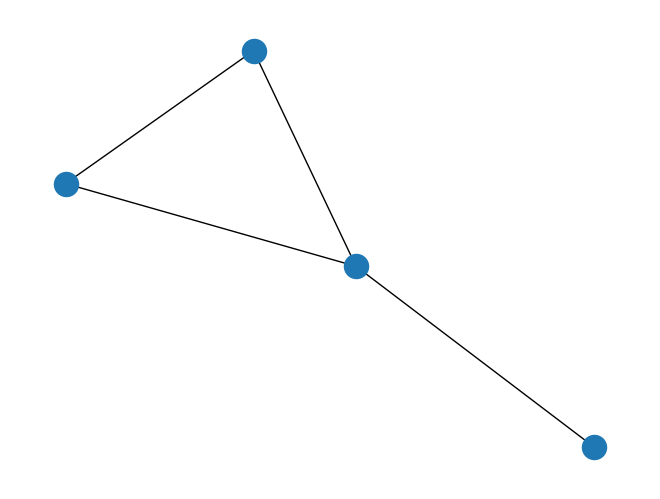

In [9]:
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G = nx.Graph()
G.add_edges_from(elist)
nt = Network('900px', '1900px')
nt.from_nx(G)
nt.show('nx.html')
nx.draw(G)

In [10]:
G[1][2]['hi']={'color':'red', 'size':10}

In [11]:
G[1][2]

{'width': 1, 'hi': {'color': 'red', 'size': 10}}

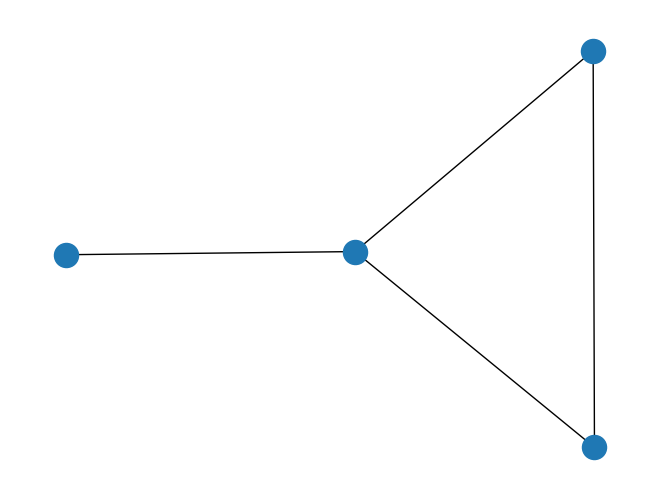

In [12]:
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G = nx.Graph()
G.add_weighted_edges_from(elist)
nt = Network('900px', '1900px')
nt.from_nx(G)
nt.show('nx.html')
nx.draw(G)

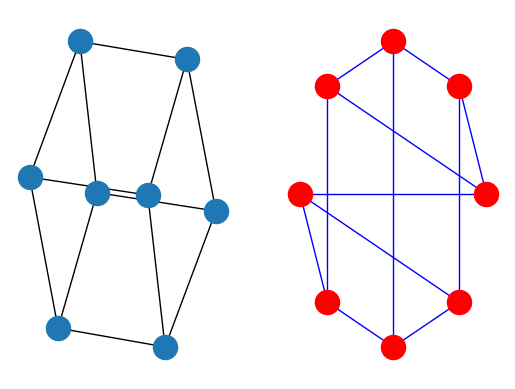

In [26]:
import matplotlib.pyplot as plt
G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G)
 # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

nt = Network('500px', '500px')
nt.from_nx(G)
nt.show('nx.html')

In [32]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'C')
print(G.adj)

{'A': {'B': {'weight': 4}}, 'B': {'A': {'weight': 4}, 'C': {}}, 'C': {'B': {}}}


In [36]:
import pandas as pd

df =pd.DataFrame(nx.adjacency_matrix(G).todense(), index=G.nodes(), columns=G.nodes())

In [37]:
df

,A,B,C
A,0,4,0
B,4,0,1
C,0,1,0


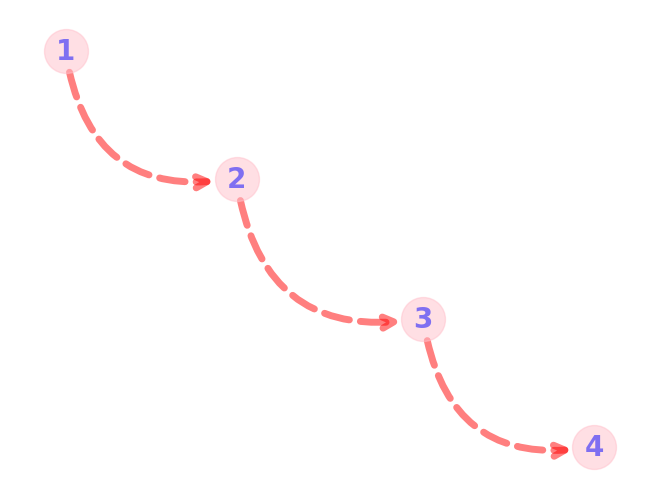

In [55]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G = nx.Graph(name="my graph")
e = [(1, 2), (2, 3), (3, 4)]  # list of edges
G = nx.Graph(e, name="my graph")
nx.draw(G, with_labels=True, font_weight='bold', node_size=1000, node_color='pink', font_size=20, font_color='blue', edge_color='red',
        width=5, alpha=0.5, style='dashed', arrows=True, arrowstyle='->', arrowsize=20, connectionstyle='arc3, rad=0.5', label='my graph')


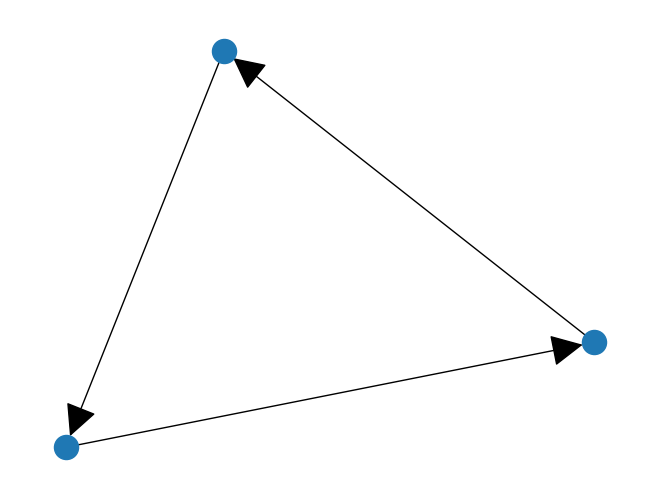

In [60]:
K3 = nx.DiGraph([(0, 1), (1, 2), (2, 0)])
nx.draw(K3, arrowsize=50)

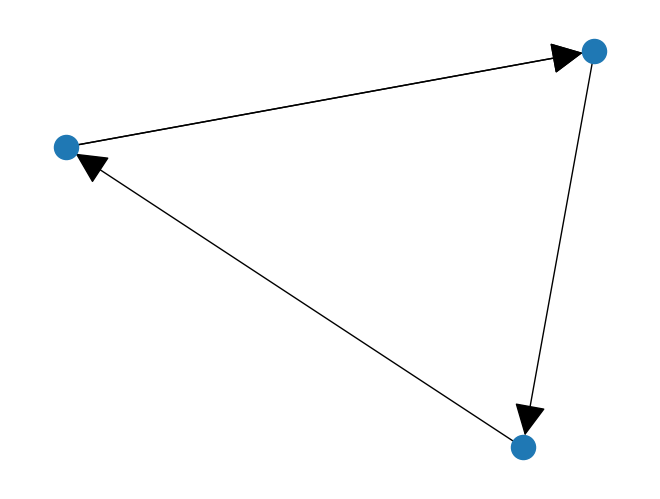

In [66]:
K3 = nx.MultiDiGraph([(0, 1), (1, 2), (2, 0), (0, 1)])
nx.draw(K3, arrowsize=50)
nt = Network('500px', '500px', directed=True)
nt.from_nx(K3)
nt.show('nx.html')

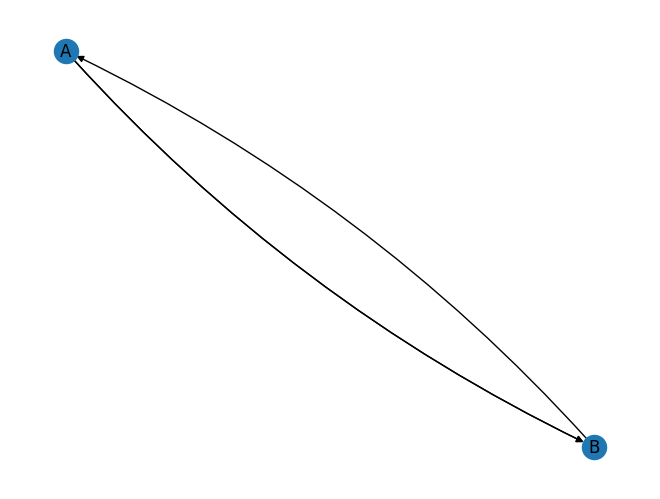

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.MultiDiGraph() #or G = nx.MultiDiGraph()
G.add_node('A')
G.add_node('B')
G.add_edge('A', 'B', length = 2)
G.add_edge('A', 'B', length = 2, weight = 3, color = 'red')
G.add_edge('B', 'A', length = 10)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in G.edges(data=True)])

plt.show()

In [70]:
G = nx.MultiDiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

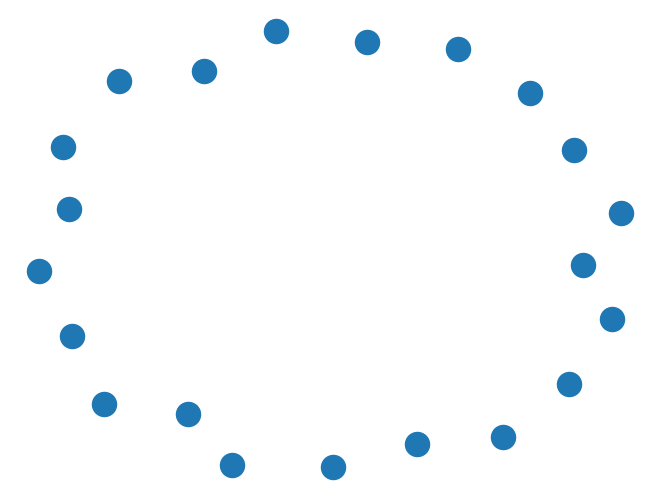

In [71]:
nx.draw(G)

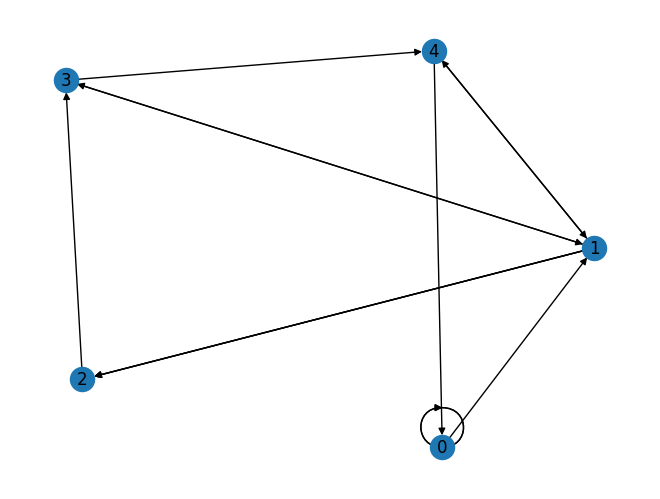

In [75]:
import networkx as nx
from IPython.display import display_svg # if displaying with jupyter
nodes = [ 0 , 1 , 2 , 3 , 4 ]
edges = [
    ( 0 , 1 ), ( 1 , 2 ), ( 2 , 3 ), ( 3 , 4 ), ( 4 , 0 ), # 0 to 4 in a loop 
    ( 0 , 0 ), ( 0 , 0 ), # self-loop 
    ( 1 , 2 ), ( 1 , 2 ), # multiple same paths 
    ( 1 , 3 ), ( 1 , 4 ), ( 3 , 1), ( 4 , 1 ) # bidirectional
    ]
g = nx.MultiDiGraph() # graph type

g.add_nodes_from(nodes) # add nodes to graph 
g.add_edges_from(edges) # add edges to graph
agraph = nx.nx_agraph.to_agraph(g)
nx.draw(agraph, with_labels= True ) # draw graph
# agraph.node_attr[ "shape" ] = "circle"  # change display 
# img = agraph.draw(prog= "dot" , format = "svg" )
# display_svg(img, raw= True ) # display in jupyter